The following sentence is needed to be able to import the unnet library. It's not needed if you install the unnet library

In [1]:
import sys
sys.path.append('../')  # to be able to use the unnet library

Let's take a look at the individual artificial neuron, performing a forward pass through the inputs

In [2]:
from unnet.nn import Neuron

neuron1 = Neuron(weights=[0.7, 0.8], bias=0.5)
result = neuron1.out([2.0, 3.0])
print(result)

w1 * x0 + w2 * x1 + bias = 4.300000000000001


Let's draw the resulting neuron, represented as a graph in which the nodes can be inputs, weights and the neuron bias. The last node will have the resulting value of the forward propagation.

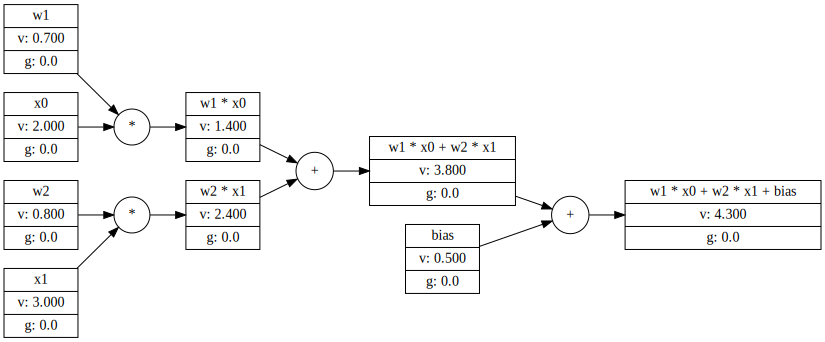

In [3]:
from unnet.utils import draw
draw(result)

We can also get a random neuron using the `Neuron.rand_neuron()` class method, which returns a neuron with random weights between `-1.0` and `1.0`

In [ ]:
from unnet.nn import Neuron

neuron = Neuron.rand_neuron(2, bias=0.5)
result = neuron.out([2.0, 3.0])
print(result)

w1 * x0 + w2 * x1 + bias = 1.7459696156382185


Let's draw this time the random neuron after the forward propagation

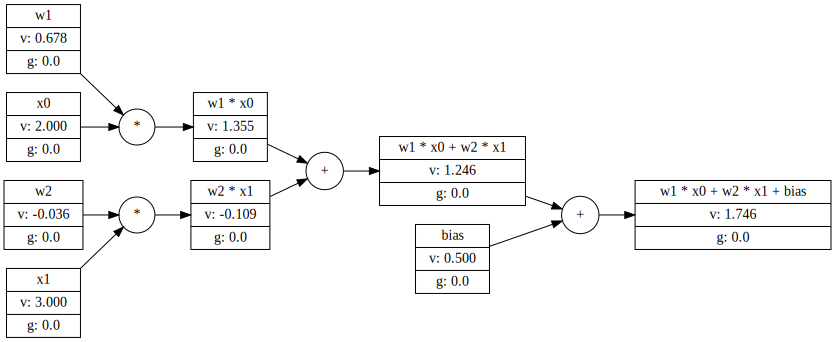

In [ ]:
from unnet.utils import draw
draw(result)